### Data
Global Power Plant Database <br>
https://resourcewatch.carto.com/u/wri-rw/dataset/powerwatch_data_20180102 <br>

In [1]:
import numpy as np
import vega
import json
from vega import Vega

### Resource Watch specification
API ID: 28c207f7-9016-4efc-b160-4aa78ab514a6 <br>
https://resourcewatch.org/embed/widget/28c207f7-9016-4efc-b160-4aa78ab514a6

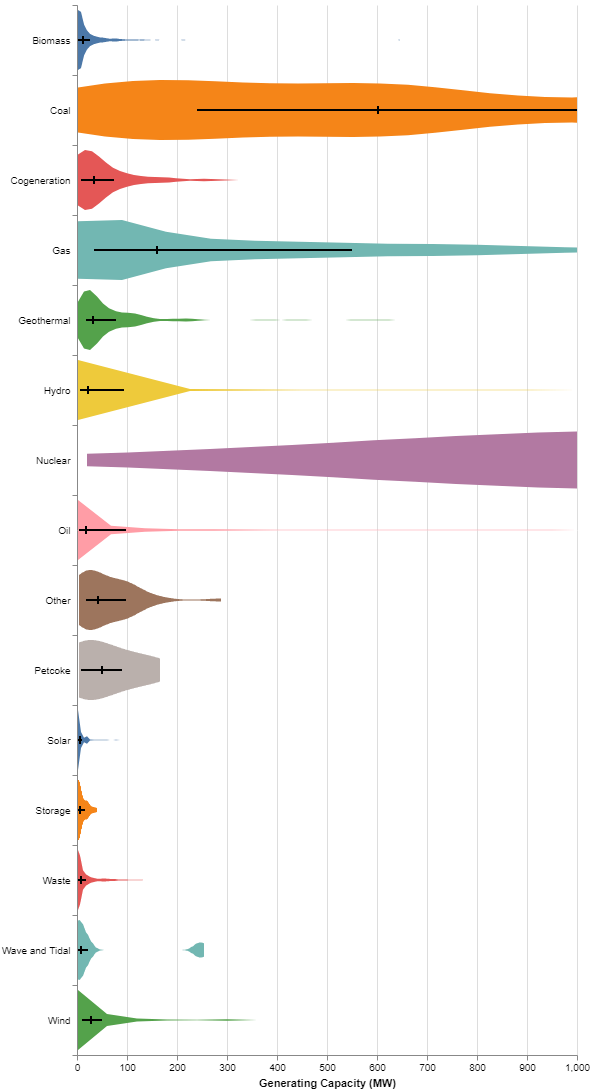

In [7]:
specV3=json.loads("""
{
  "width":500,
  "height": 800,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "config": {
    "axisBand": {
      "bandPosition": 1,
      "tickExtra": true,
      "tickOffset": 0
    }
  },
  "signals": [
    {
      "name": "fields",
      "value": [
        "Biomass",
        "Coal",
        "Cogeneration",
        "Gas",
        "Geothermal",
        "Hydro",
        "Nuclear",
        "Oil",
        "Other",
        "Petcoke",
        "Solar",
        "Storage",
        "Waste",
        "Wave and Tidal",
        "Wind"
      ]
    },
    {
      "name": "plotWidth",
      "value": 60
    },
    {
      "name": "height",
      "update": "(plotWidth + 10) * length(fields)"
    },
    {
      "name": "bandwidth",
      "value": 100
    },
    {
      "name": "steps",
      "value": 100
    },
    {
      "name": "Maximum (MW)",
      "value": 1000,
      "bind": {
        "input": "range",
        "min": 400,
        "max": 9000,
        "step": 200
      }
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT country_long AS country, name, capacity_mw AS capacity, fuel1 AS type FROM powerwatch_data_20180102 WHERE fuel1 IS NOT NULL AND fuel1!='' ORDER BY type ASC",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": []
    }
  ],
  "scales": [
    {
      "name": "layout",
      "type": "band",
      "domain": {
        "data": "table",
        "field": "type"
      },
      "range": "height"
    },
    {
      "name": "xscale",
      "type": "linear",
      "domain": [
        0,
        {
          "signal": "Maximum (MW)"
        }
      ],
      "range": "width",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category"
    }
  ],
  "axes": [
    {
      "title": "Generating Capacity (MW)",
      "orient": "bottom",
      "scale": "xscale",
      "grid": true,
      "zindex": 0
    },
    {
      "orient": "left",
      "scale": "layout",
      "tickCount": 5,
      "grid": false,
      "zindex": 0
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "data": "table",
          "name": "types",
          "groupby": "type"
        }
      },
      "clip": true,
      "encode": {
        "enter": {
          "yc": {
            "scale": "layout",
            "field": "type",
            "band": 0.5
          },
          "height": {
            "signal": "plotWidth"
          },
          "width": {
            "signal": "width"
          }
        }
      },
      "data": [
        {
          "name": "density",
          "transform": [
            {
              "type": "density",
              "steps": {
                "signal": "steps"
              },
              "as": [
                "capacity",
                "density"
              ],
              "distribution": {
                "function": "kde",
                "from": "types",
                "field": "capacity"
              }
            },
            {
              "type": "stack",
              "groupby": [
                "capacity"
              ],
              "field": "density",
              "offset": "center",
              "as": [
                "y0",
                "y1"
              ]
            }
          ]
        },
        {
          "name": "summary",
          "source": "types",
          "transform": [
            {
              "type": "aggregate",
              "fields": [
                "capacity",
                "capacity",
                "capacity"
              ],
              "ops": [
                "q1",
                "median",
                "q3"
              ],
              "as": [
                "q1",
                "median",
                "q3"
              ]
            }
          ]
        }
      ],
      "scales": [
        {
          "name": "yscale",
          "type": "linear",
          "range": [
            0,
            {
              "signal": "plotWidth"
            }
          ],
          "domain": {
            "data": "density",
            "field": "density"
          }
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {
            "data": "density"
          },
          "encode": {
            "enter": {
              "fill": {
                "scale": "color",
                "field": {
                  "parent": "type"
                }
              }
            },
            "update": {
              "x": {
                "scale": "xscale",
                "field": "capacity"
              },
              "y": {
                "scale": "yscale",
                "field": "y0"
              },
              "y2": {
                "scale": "yscale",
                "field": "y1"
              }
            }
          }
        },
        {
          "type": "rect",
          "from": {
            "data": "summary"
          },
          "encode": {
            "enter": {
              "fill": {
                "value": "black"
              },
              "height": {
                "value": 2
              }
            },
            "update": {
              "yc": {
                "signal": "plotWidth / 2"
              },
              "x": {
                "scale": "xscale",
                "field": "q1"
              },
              "x2": {
                "scale": "xscale",
                "field": "q3"
              }
            },
            "hover": {
              "tooltip": {
                "signal": "{'1st Quartile':datum.q1 + ' MW','Median':datum.median + ' MW', '3rd Quartile':datum.q3 + ' MW'}"
              }
            }
          }
        },
        {
          "type": "rect",
          "from": {
            "data": "summary"
          },
          "encode": {
            "enter": {
              "fill": {
                "value": "black"
              },
              "width": {
                "value": 2
              },
              "height": {
                "value": 8
              }
            },
            "update": {
              "yc": {
                "signal": "plotWidth / 2"
              },
              "x": {
                "scale": "xscale",
                "field": "median"
              }
            },
            "hover": {
              "tooltip": {
                "signal": "{'1st Quartile':datum.q1 + ' MW','Median':datum.median + ' MW', '3rd Quartile':datum.q3 + ' MW'}"
              }
            }
          }
        }
      ]
    }
  ]
}
""")
vega4view=dict(specV3)
vega4view['width']=500
vega4view['height']=800
Vega(vega4view)

### Stand-alone specification
(eg for use with https://vega.github.io/editor/#/)

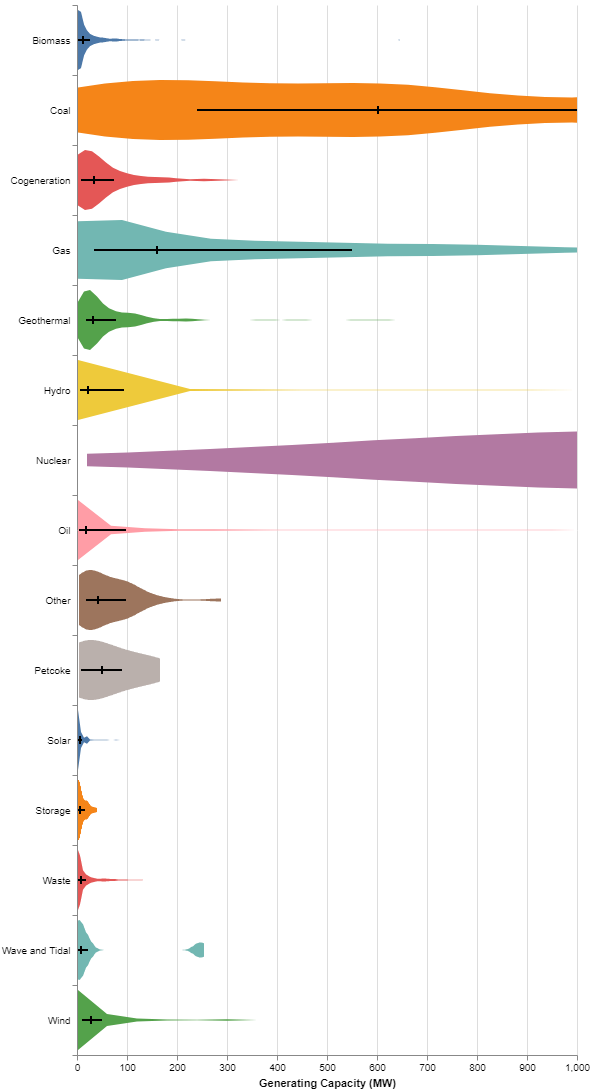

In [6]:
specV3=json.loads("""
{
  "width":500,
  "height": 800,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "config": {
    "axisBand": {
      "bandPosition": 1,
      "tickExtra": true,
      "tickOffset": 0
    }
  },
  "signals": [
    {
      "name": "fields",
      "value": [
        "Biomass",
        "Coal",
        "Cogeneration",
        "Gas",
        "Geothermal",
        "Hydro",
        "Nuclear",
        "Oil",
        "Other",
        "Petcoke",
        "Solar",
        "Storage",
        "Waste",
        "Wave and Tidal",
        "Wind"
      ]
    },
    {
      "name": "plotWidth",
      "value": 60
    },
    {
      "name": "height",
      "update": "(plotWidth + 10) * length(fields)"
    },
    {
      "name": "bandwidth",
      "value": 100
    },
    {
      "name": "steps",
      "value": 100
    },
    {
      "name": "Maximum (MW)",
      "value": 1000,
      "bind": {
        "input": "range",
        "min": 400,
        "max": 9000,
        "step": 200
      }
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT country_long AS country, name, capacity_mw AS capacity, fuel1 AS type FROM powerwatch_data_20180102 WHERE fuel1 IS NOT NULL AND fuel1!='' ORDER BY type ASC",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": []
    }
  ],
  "scales": [
    {
      "name": "layout",
      "type": "band",
      "domain": {
        "data": "table",
        "field": "type"
      },
      "range": "height"
    },
    {
      "name": "xscale",
      "type": "linear",
      "domain": [
        0,
        {
          "signal": "Maximum (MW)"
        }
      ],
      "range": "width",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category"
    }
  ],
  "axes": [
    {
      "title": "Generating Capacity (MW)",
      "orient": "bottom",
      "scale": "xscale",
      "grid": true,
      "zindex": 0
    },
    {
      "orient": "left",
      "scale": "layout",
      "tickCount": 5,
      "grid": false,
      "zindex": 0
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "data": "table",
          "name": "types",
          "groupby": "type"
        }
      },
      "clip": true,
      "encode": {
        "enter": {
          "yc": {
            "scale": "layout",
            "field": "type",
            "band": 0.5
          },
          "height": {
            "signal": "plotWidth"
          },
          "width": {
            "signal": "width"
          }
        }
      },
      "data": [
        {
          "name": "density",
          "transform": [
            {
              "type": "density",
              "steps": {
                "signal": "steps"
              },
              "as": [
                "capacity",
                "density"
              ],
              "distribution": {
                "function": "kde",
                "from": "types",
                "field": "capacity"
              }
            },
            {
              "type": "stack",
              "groupby": [
                "capacity"
              ],
              "field": "density",
              "offset": "center",
              "as": [
                "y0",
                "y1"
              ]
            }
          ]
        },
        {
          "name": "summary",
          "source": "types",
          "transform": [
            {
              "type": "aggregate",
              "fields": [
                "capacity",
                "capacity",
                "capacity"
              ],
              "ops": [
                "q1",
                "median",
                "q3"
              ],
              "as": [
                "q1",
                "median",
                "q3"
              ]
            }
          ]
        }
      ],
      "scales": [
        {
          "name": "yscale",
          "type": "linear",
          "range": [
            0,
            {
              "signal": "plotWidth"
            }
          ],
          "domain": {
            "data": "density",
            "field": "density"
          }
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {
            "data": "density"
          },
          "encode": {
            "enter": {
              "fill": {
                "scale": "color",
                "field": {
                  "parent": "type"
                }
              }
            },
            "update": {
              "x": {
                "scale": "xscale",
                "field": "capacity"
              },
              "y": {
                "scale": "yscale",
                "field": "y0"
              },
              "y2": {
                "scale": "yscale",
                "field": "y1"
              }
            }
          }
        },
        {
          "type": "rect",
          "from": {
            "data": "summary"
          },
          "encode": {
            "enter": {
              "fill": {
                "value": "black"
              },
              "height": {
                "value": 2
              }
            },
            "update": {
              "yc": {
                "signal": "plotWidth / 2"
              },
              "x": {
                "scale": "xscale",
                "field": "q1"
              },
              "x2": {
                "scale": "xscale",
                "field": "q3"
              }
            },
            "hover": {
              "tooltip": {
                "signal": "{'1st Quartile':datum.q1 + ' MW','Median':datum.median + ' MW', '3rd Quartile':datum.q3 + ' MW'}"
              }
            }
          }
        },
        {
          "type": "rect",
          "from": {
            "data": "summary"
          },
          "encode": {
            "enter": {
              "fill": {
                "value": "black"
              },
              "width": {
                "value": 2
              },
              "height": {
                "value": 8
              }
            },
            "update": {
              "yc": {
                "signal": "plotWidth / 2"
              },
              "x": {
                "scale": "xscale",
                "field": "median"
              }
            },
            "hover": {
              "tooltip": {
                "signal": "{'1st Quartile':datum.q1 + ' MW','Median':datum.median + ' MW', '3rd Quartile':datum.q3 + ' MW'}"
              }
            }
          }
        }
      ]
    }
  ]
}
""")
vega4view=dict(specV3)
Vega(vega4view)